In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("/content/UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


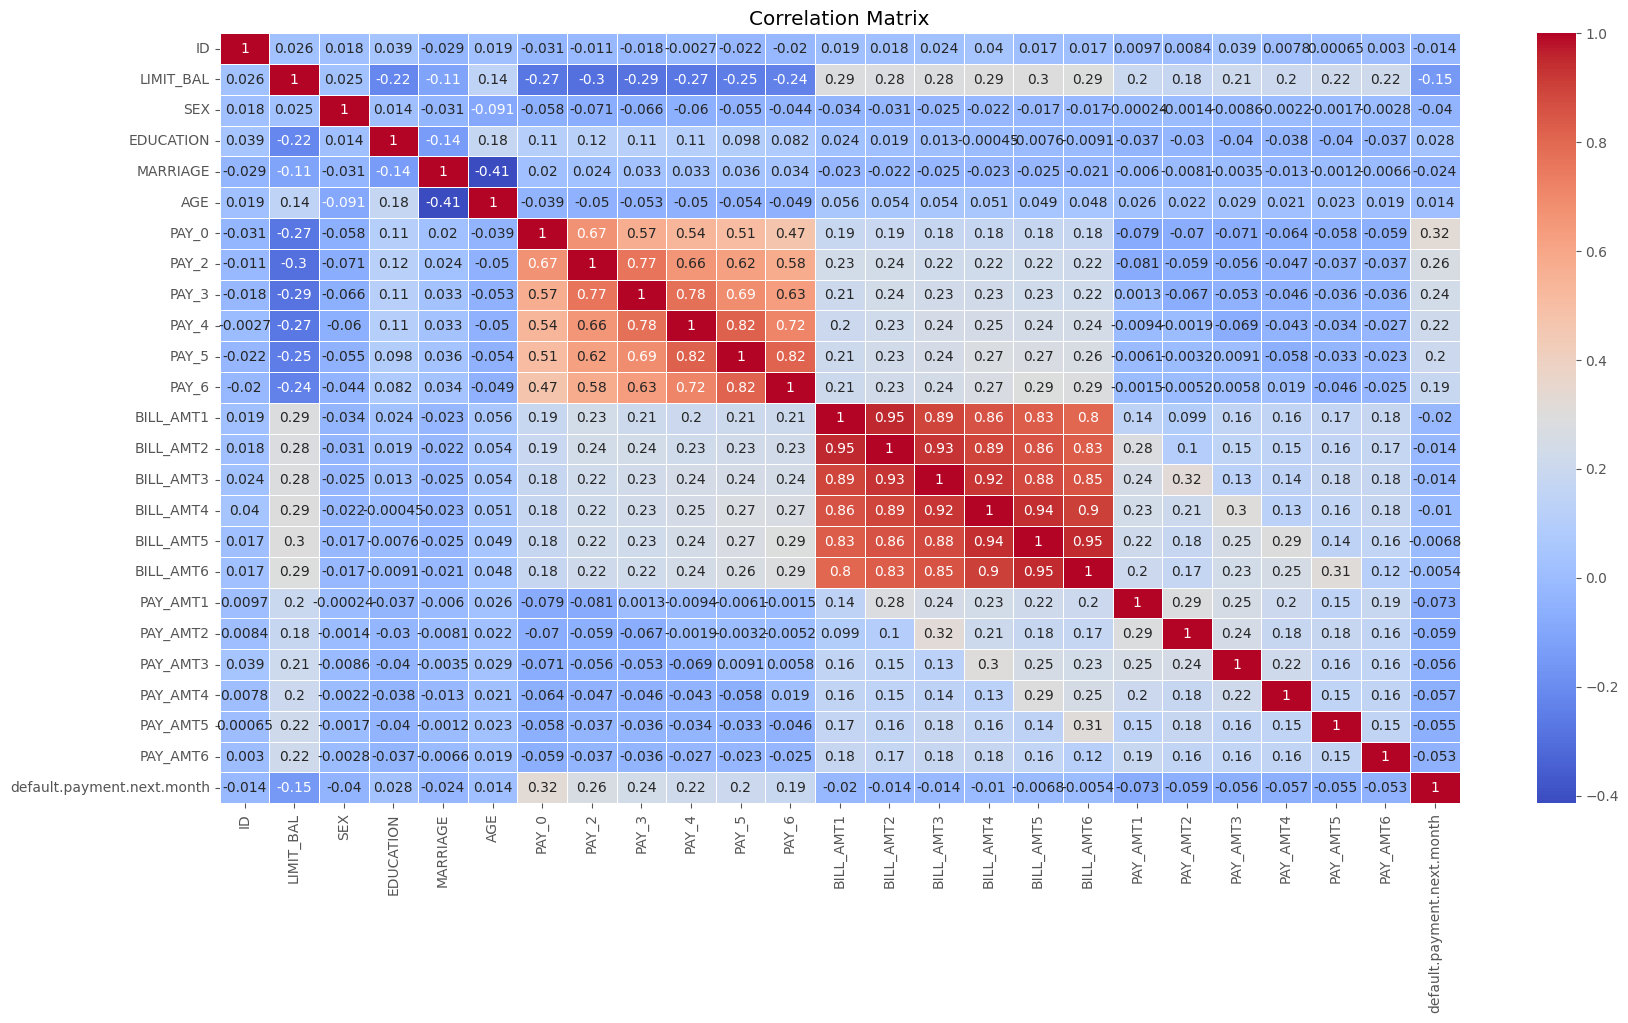

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

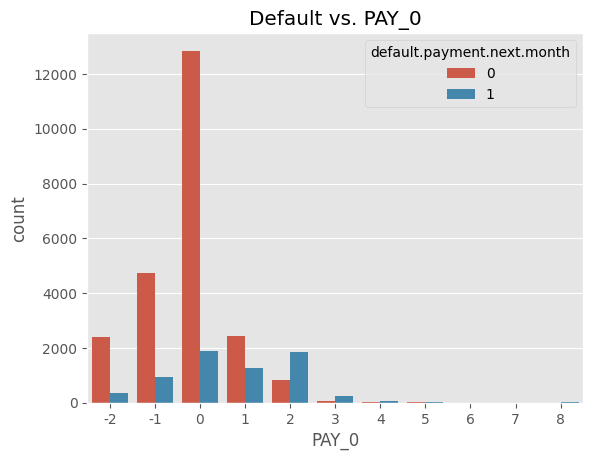

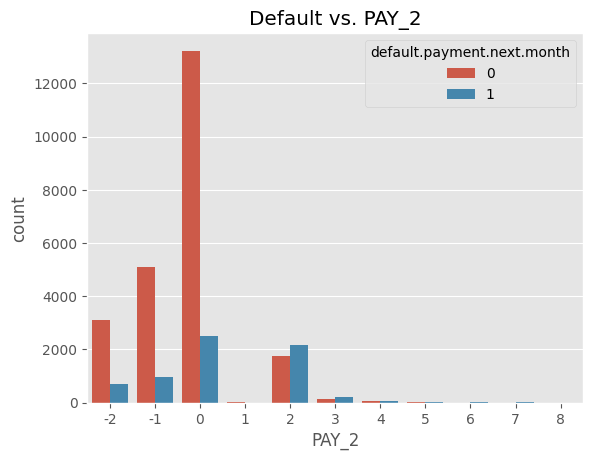

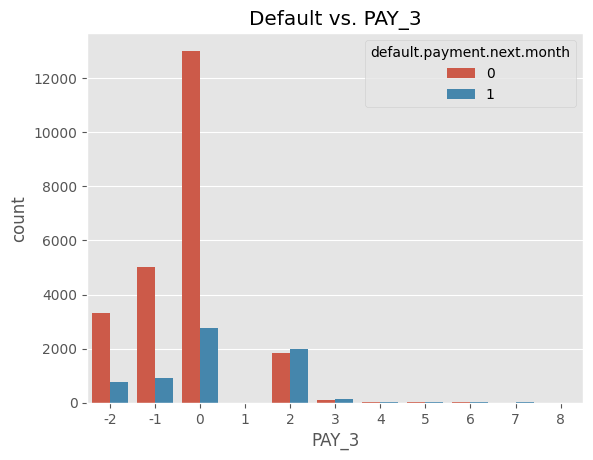

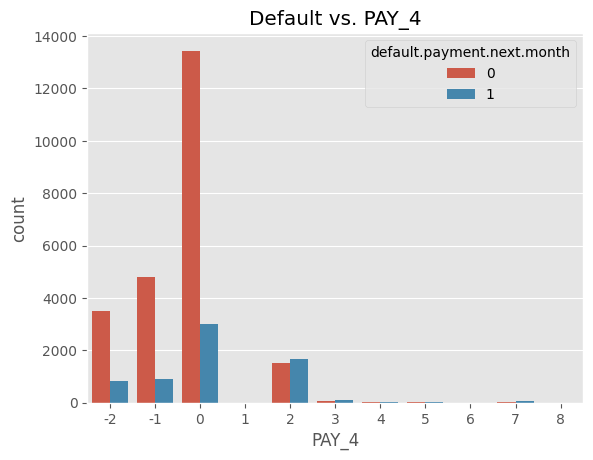

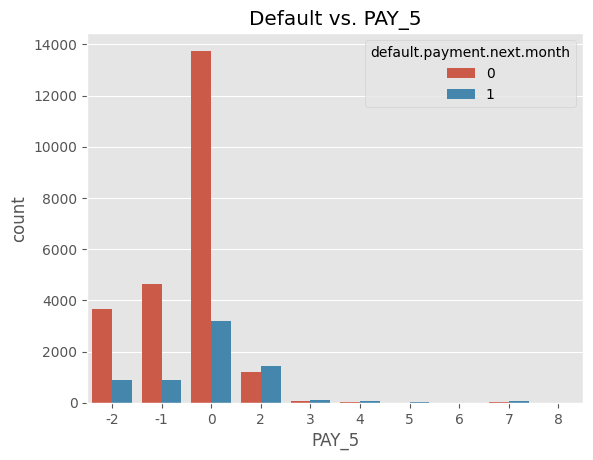

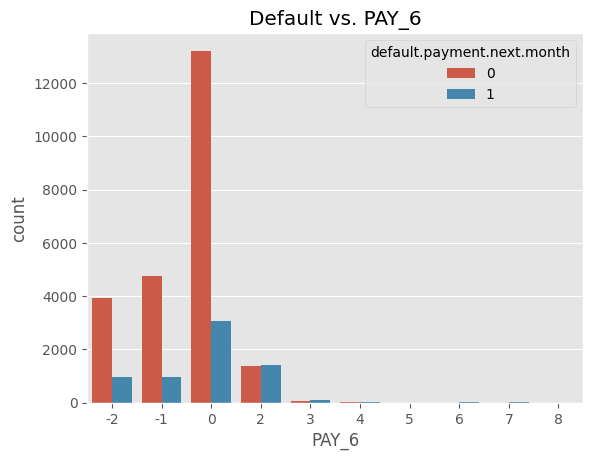

In [15]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
    sns.countplot(x = col, hue= 'default.payment.next.month', data=df)
    plt.title(f'Default vs. {col}')
    plt.show()

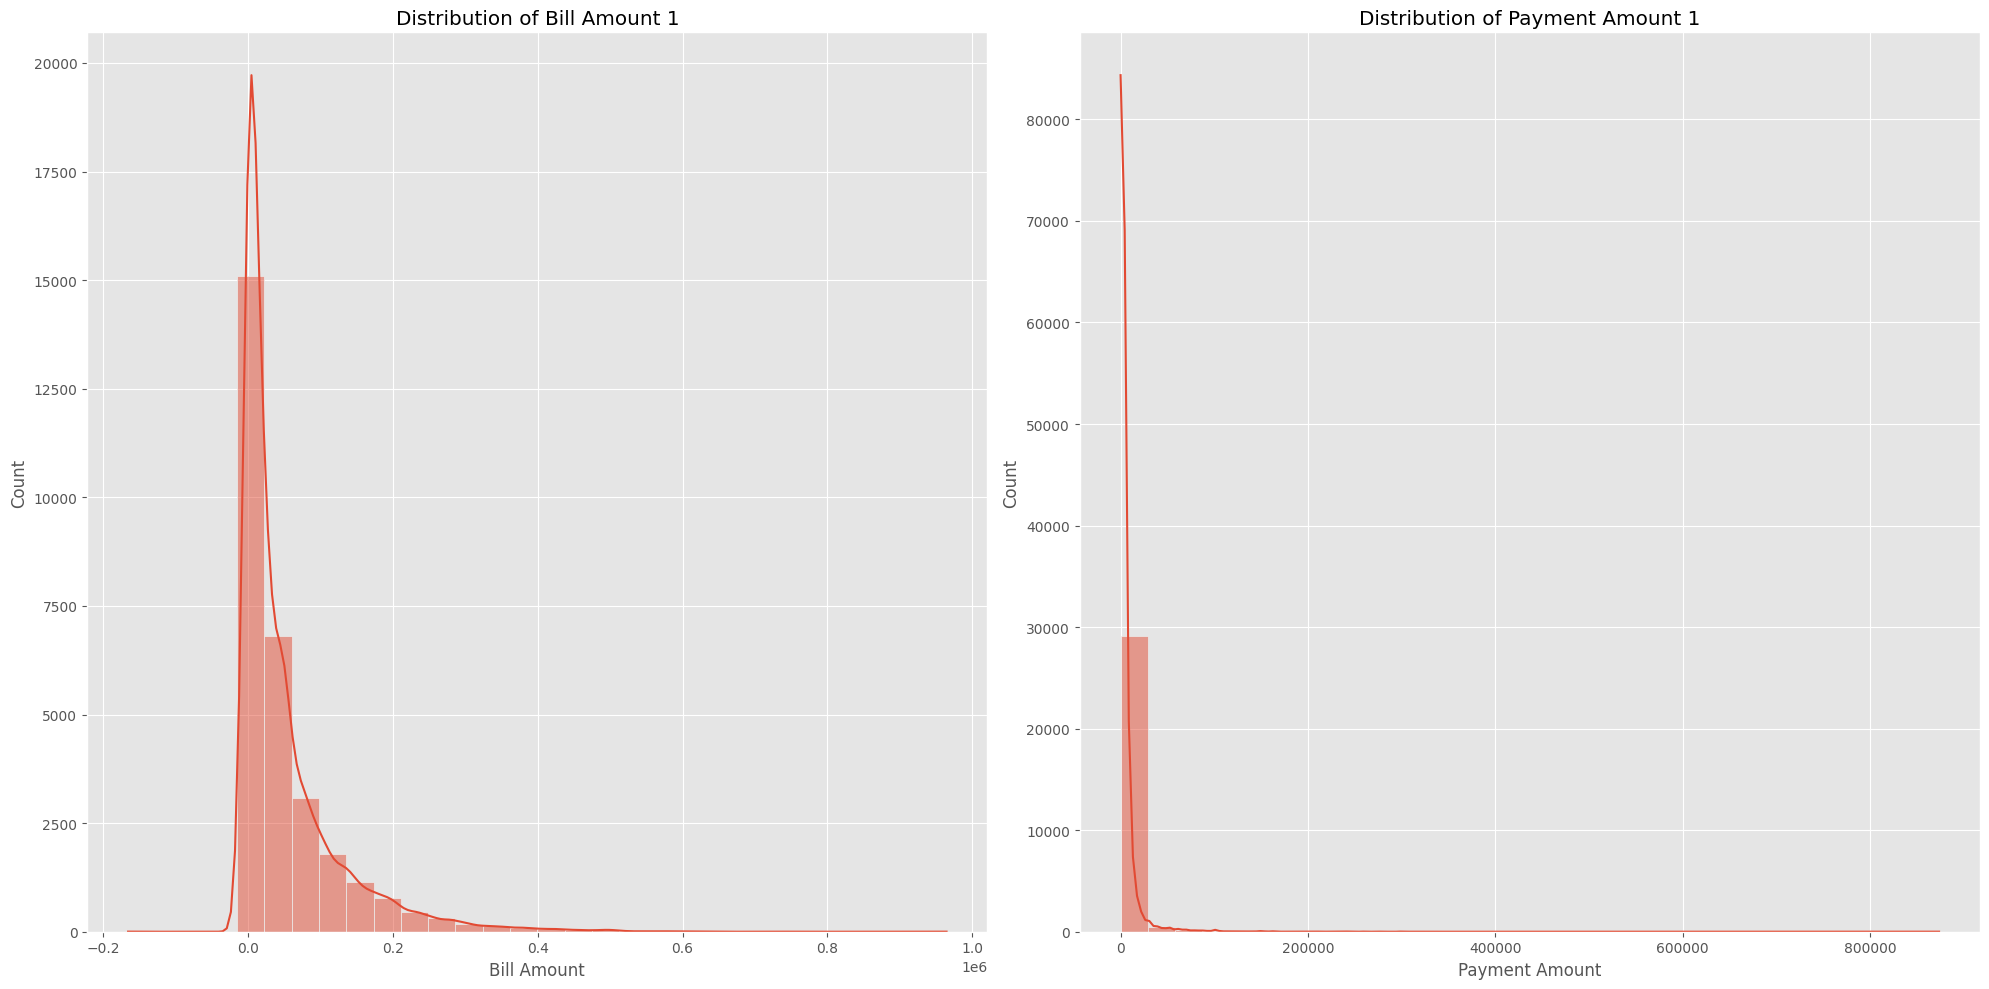

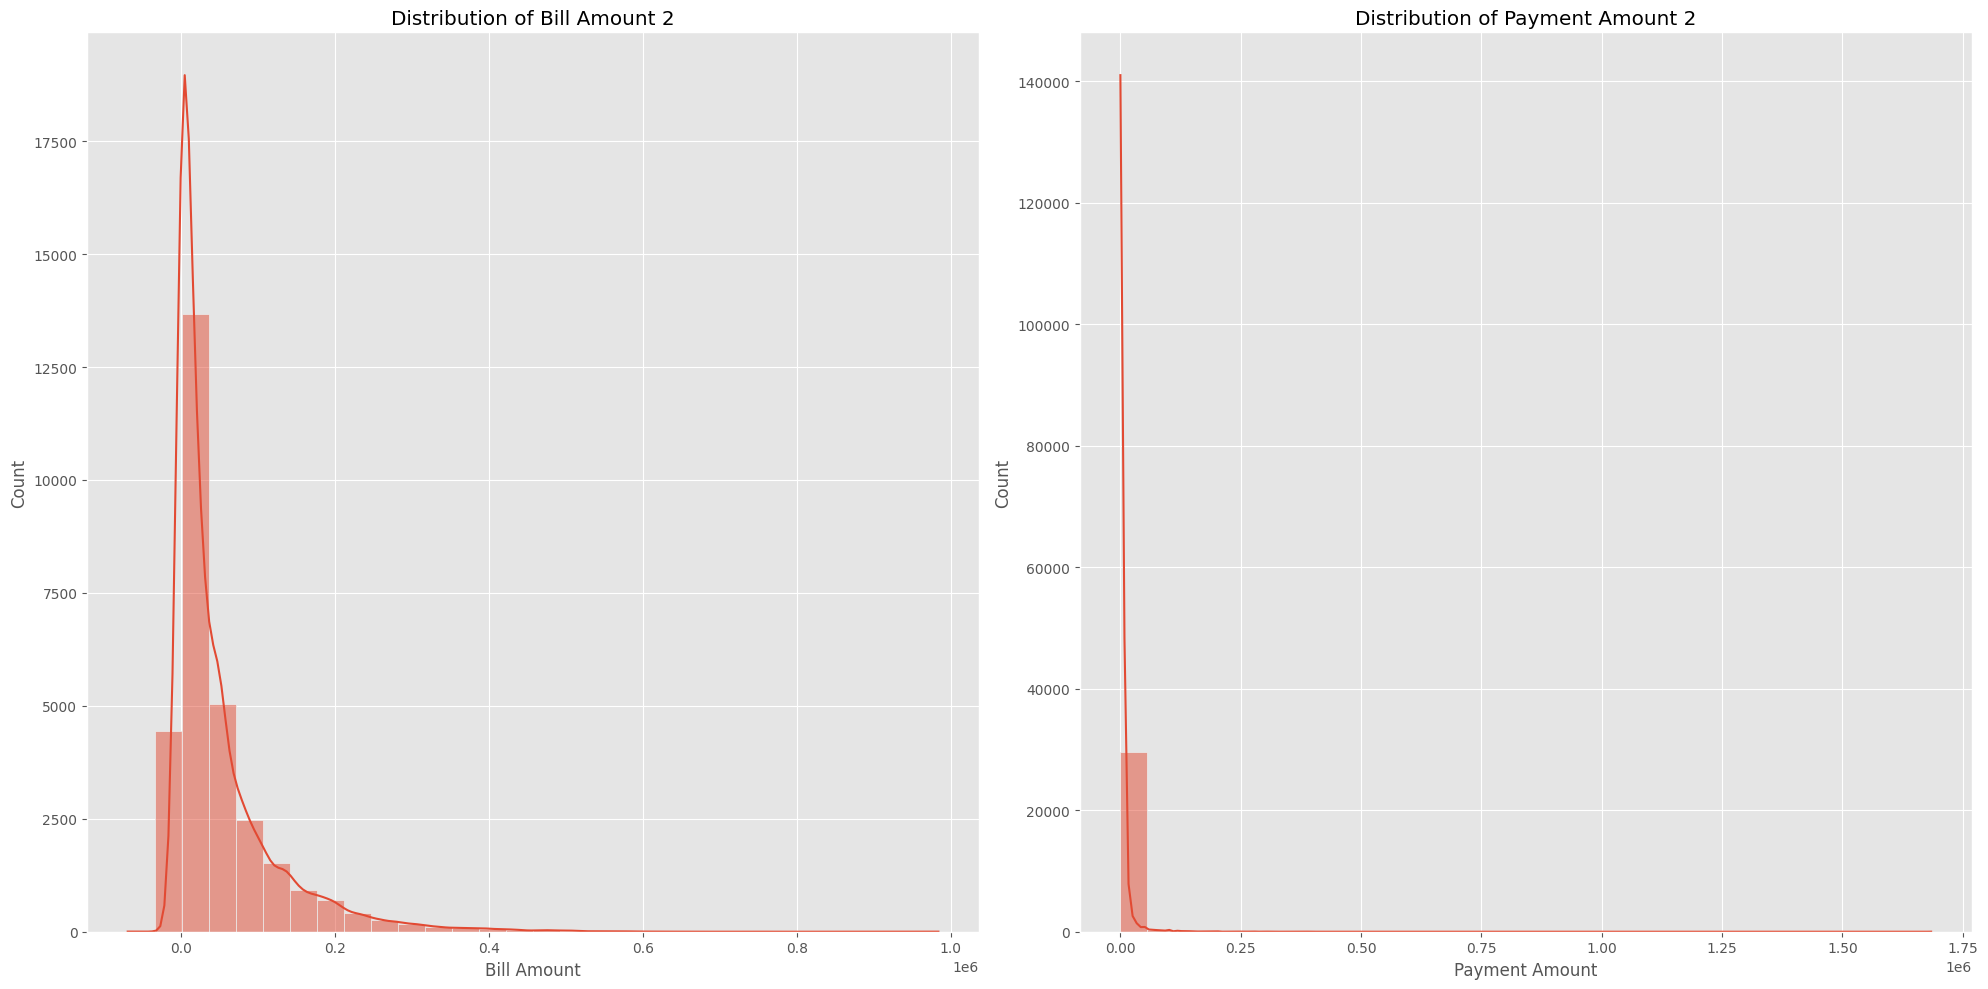

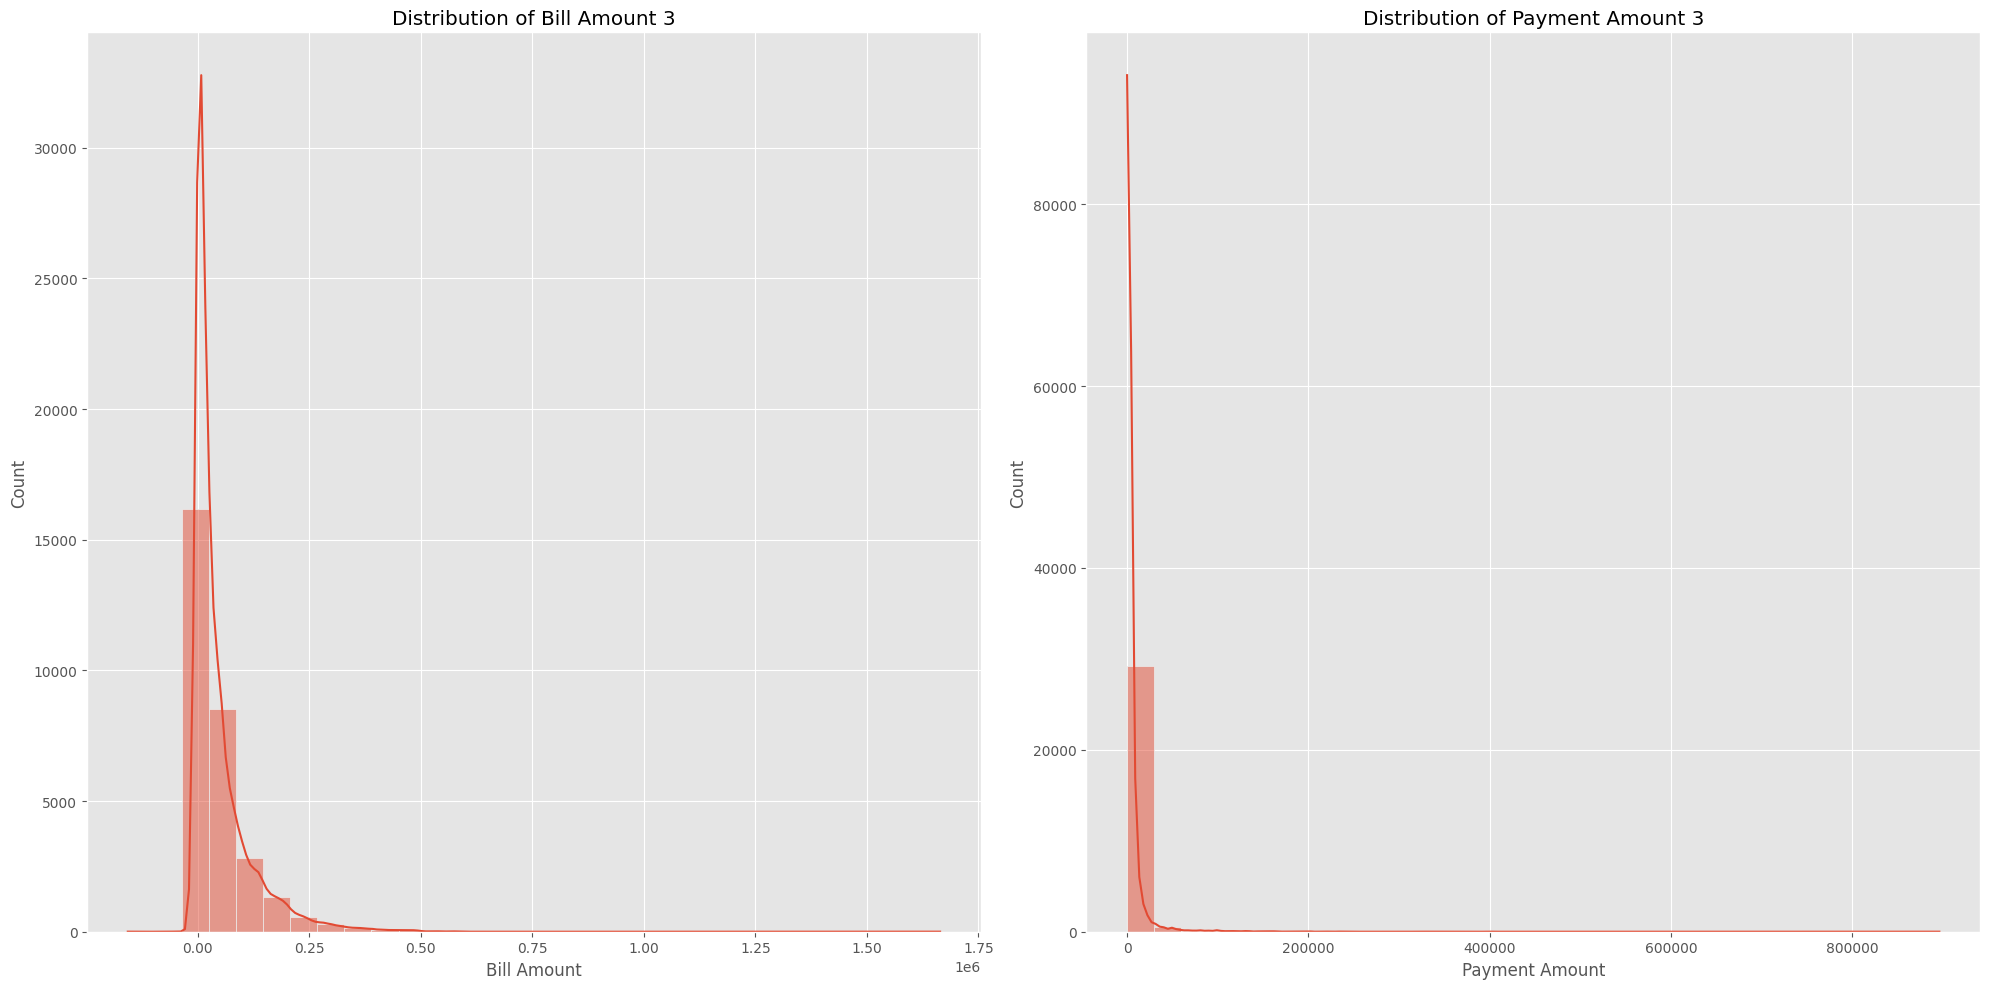

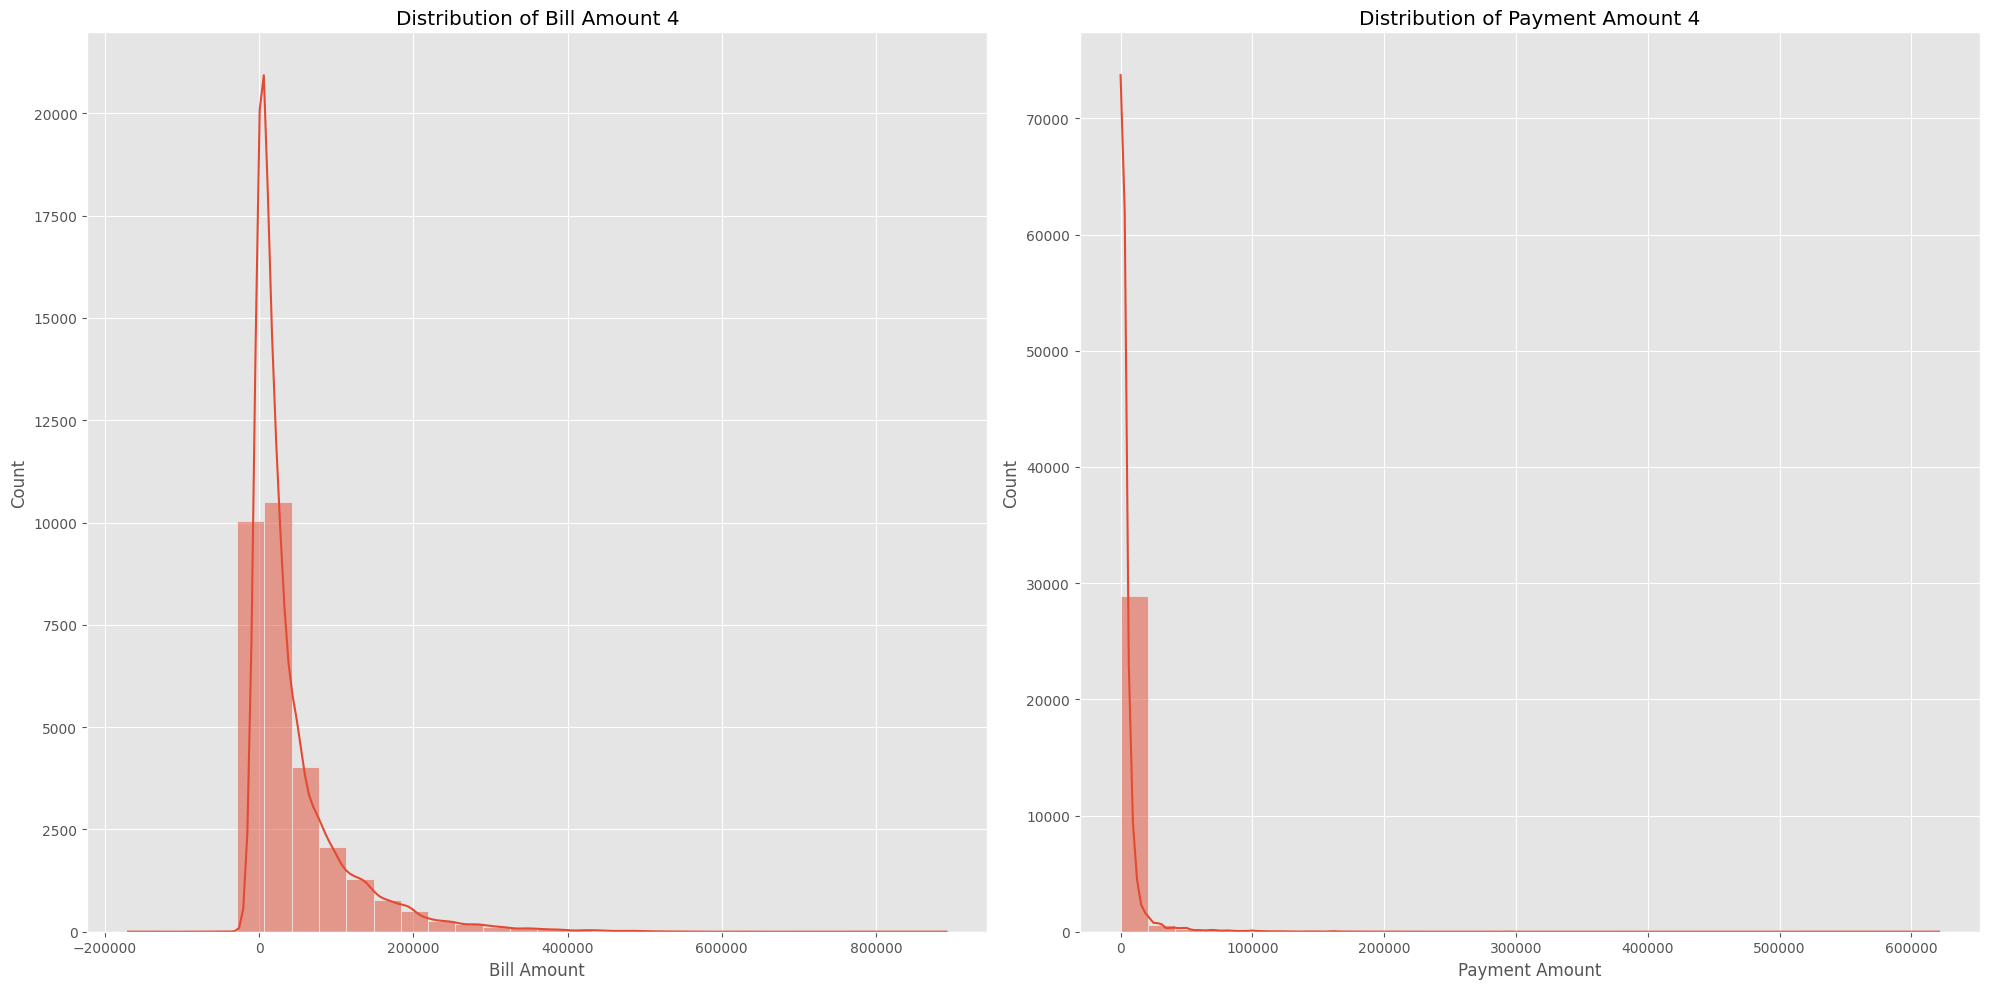

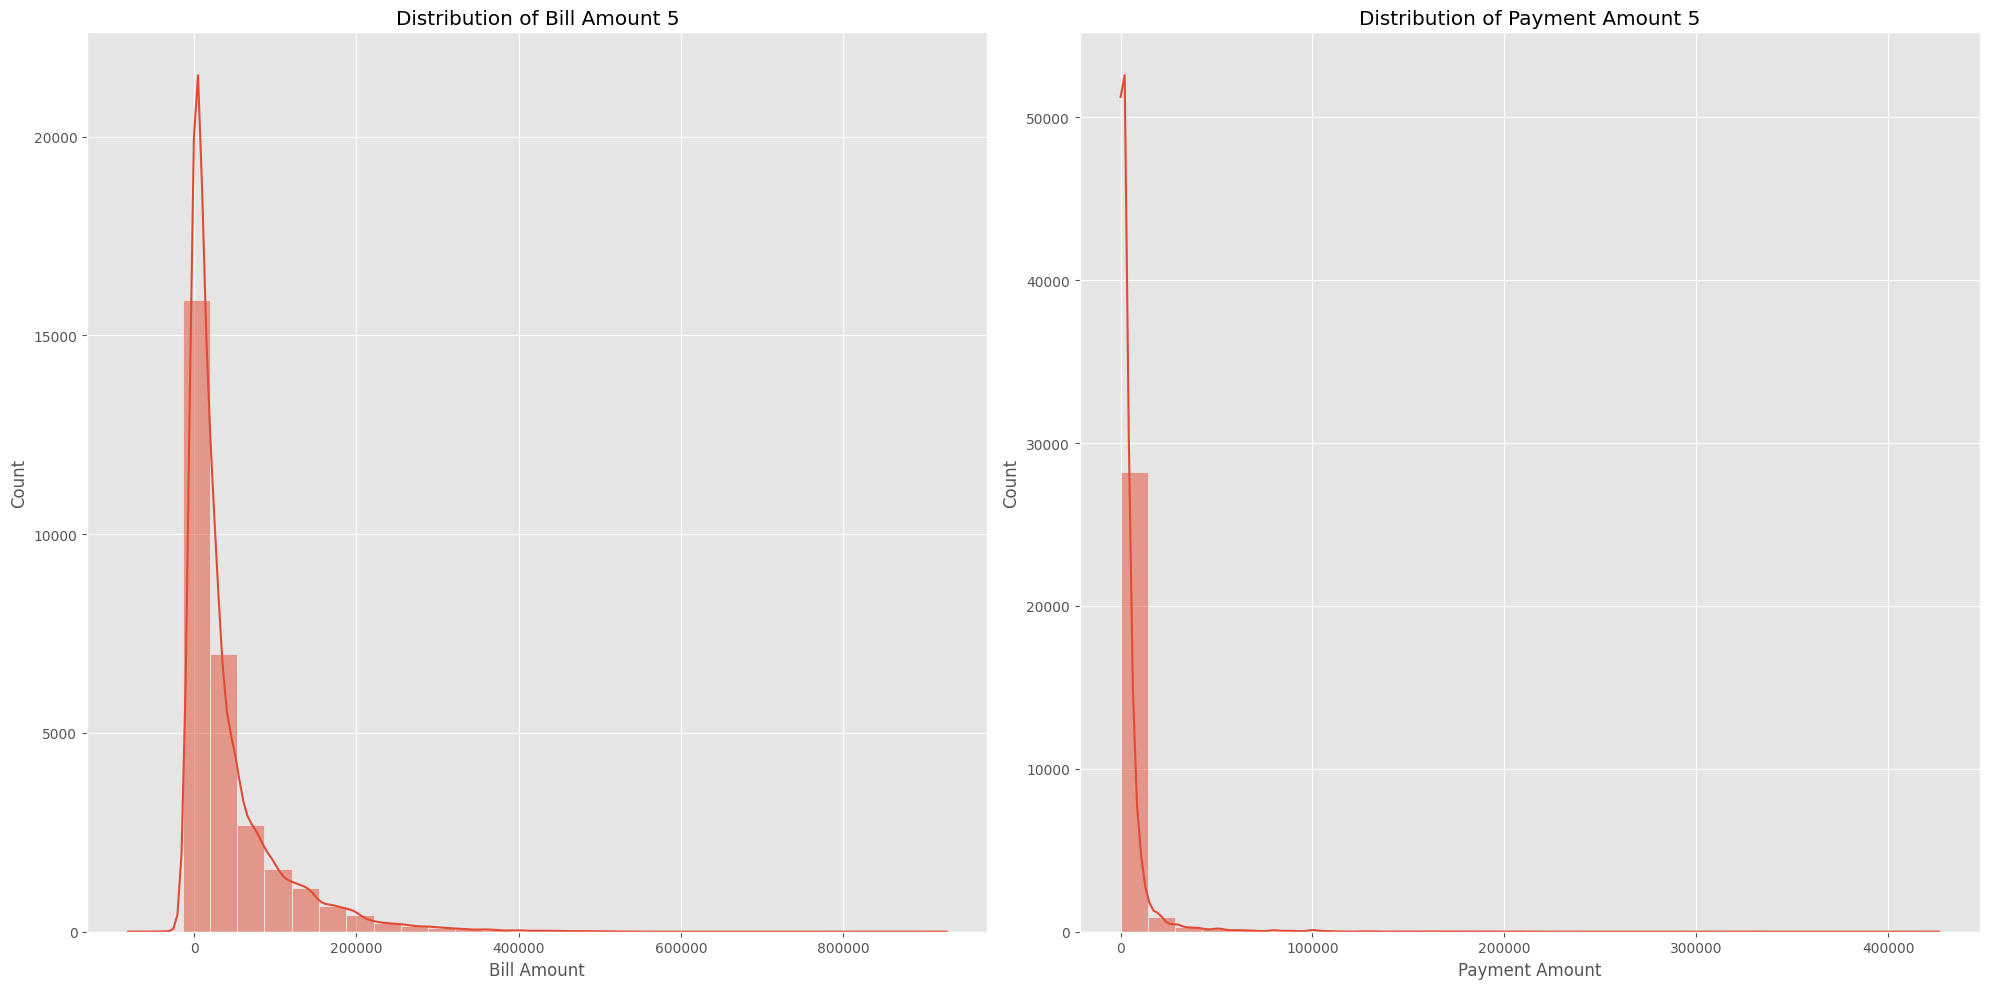

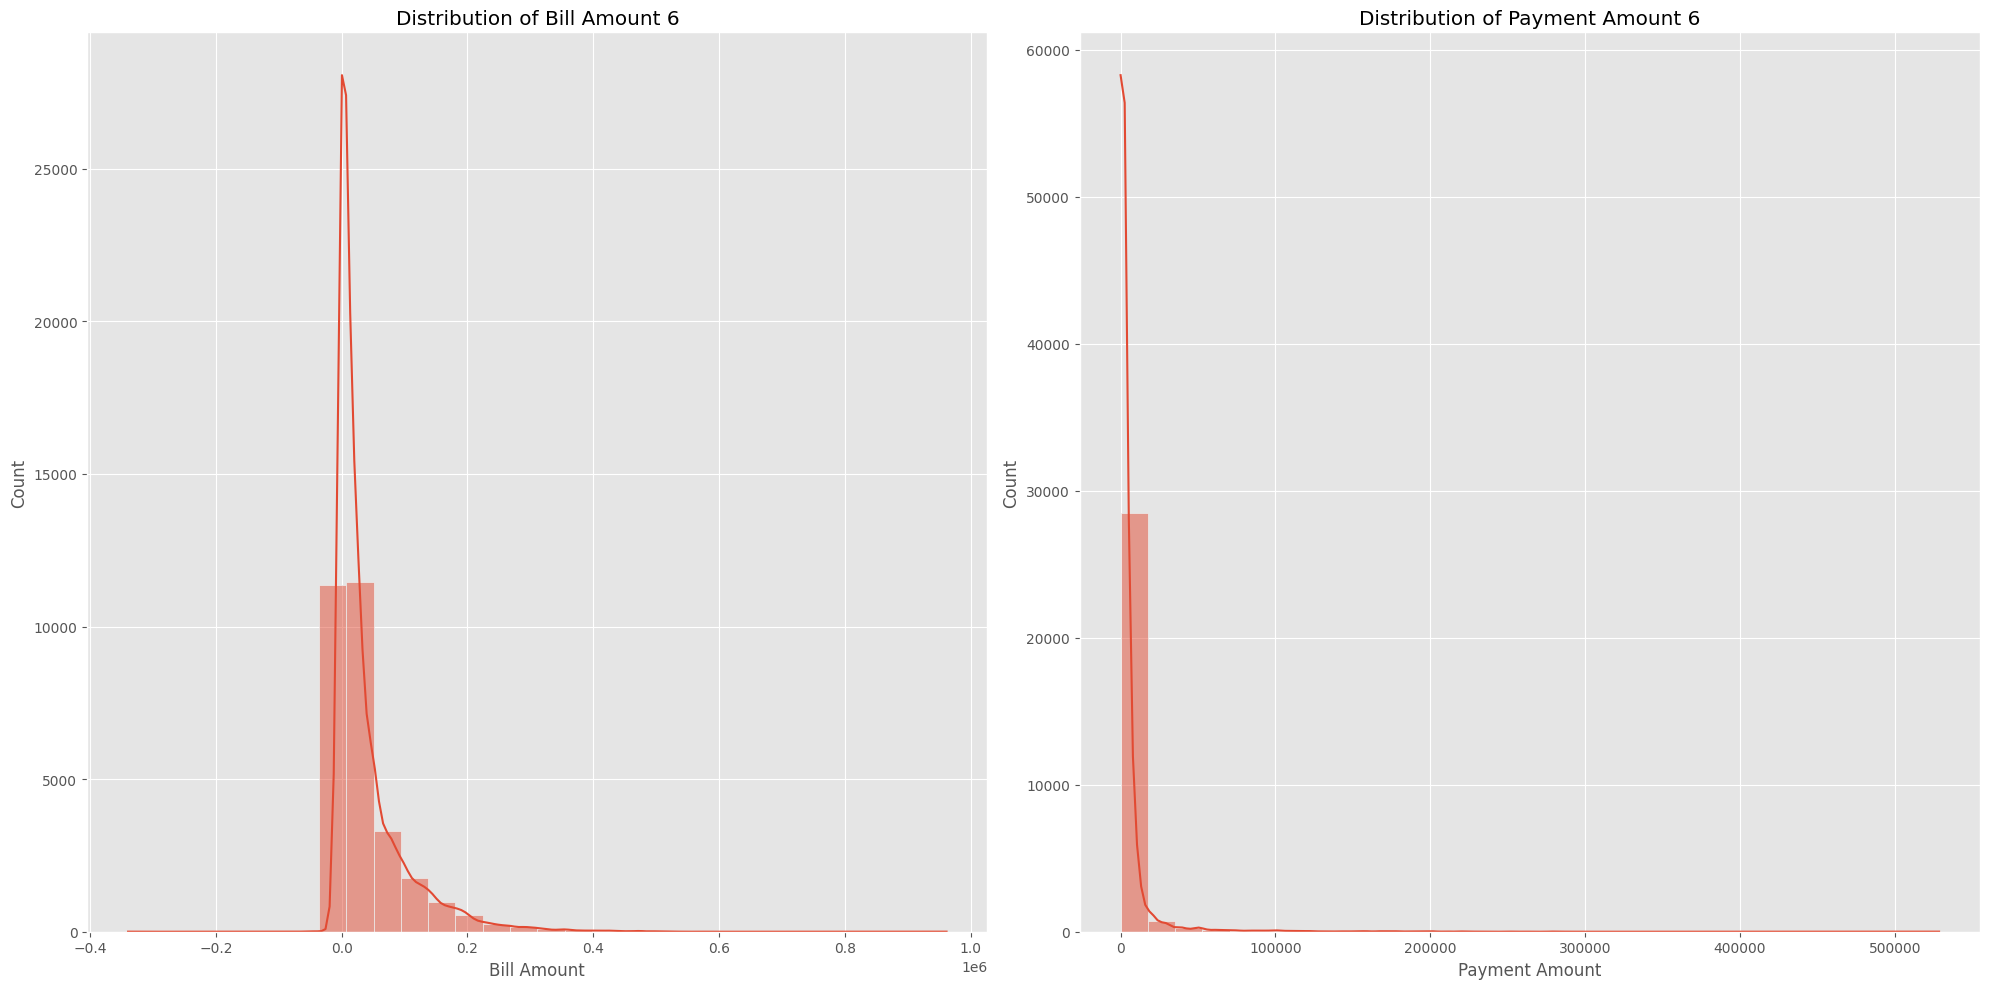

In [17]:
for i in range(1,7):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.histplot(df[f'BILL_AMT{i}'], bins = 30, kde = True)
  plt.title(f'Distribution of Bill Amount {i}')
  plt.xlabel('Bill Amount')
  plt.ylabel('Count')


  plt.subplot(1,2,2)
  sns.histplot(df[f'PAY_AMT{i}'], bins = 30, kde = True)
  plt.title(f'Distribution of Payment Amount {i}')
  plt.xlabel('Payment Amount')
  plt.ylabel('Count')

  plt.tight_layout()
  plt.show()

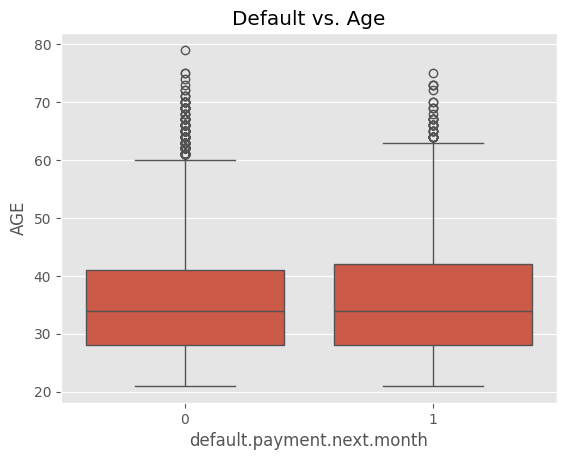

In [18]:
sns.boxplot(x = 'default.payment.next.month', y = 'AGE', data = df)
plt.title('Default vs. Age')
plt.show()

<Figure size 2000x1000 with 0 Axes>

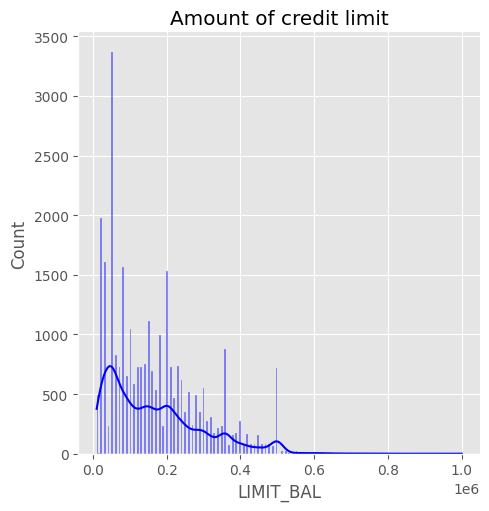

In [20]:
plt.figure(figsize = (20,10))
sns.displot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'blue')
plt.title('Amount of credit limit')
plt.show()

In [21]:
df['LIMIT_BAL'].value_counts().head()

,count
LIMIT_BAL,
50000.0,3365
20000.0,1976
30000.0,1610
80000.0,1567
200000.0,1528


<ipython-input-24-61b767c27e92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
<ipython-input-24-61b767c27e92>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0, kde = True, bins = 200, color = 'red')


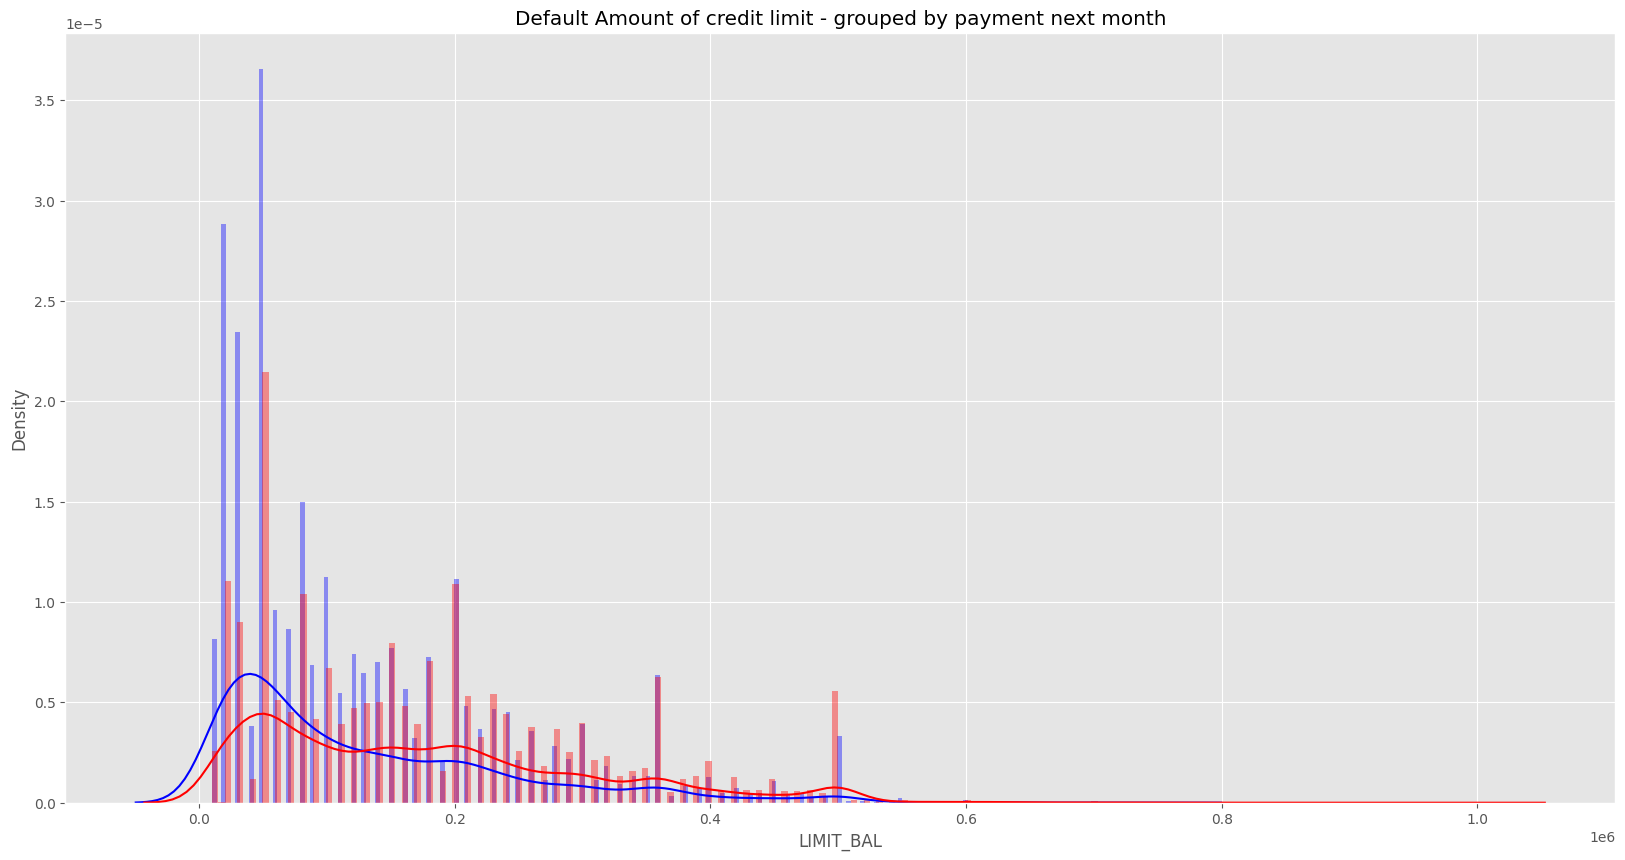

In [24]:
class_0 = df.loc[df['default.payment.next.month'] ==  0]['LIMIT_BAL']
class_1 = df.loc[df['default.payment.next.month'] ==  1]['LIMIT_BAL']

plt.figure(figsize = (20,10))
plt.title('Default Amount of credit limit - grouped by payment next month')
sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
sns.distplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()

In [25]:
df.drop('ID', axis = 1, inplace = True)

In [26]:
df.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19142,320000.0,2,1,2,27,-1,0,0,0,-1,0,19950.0,24544.0,31236.0,66091.0,5800.0,5800.0,5000.0,10000.0,36091.0,5800.0,0.0,464.0,0
8550,70000.0,2,2,1,25,0,0,0,0,0,0,34645.0,36021.0,32128.0,27265.0,27133.0,26234.0,2000.0,1804.0,1100.0,1005.0,1504.0,1007.0,0
1654,50000.0,1,2,2,30,0,0,0,0,0,0,50507.0,48751.0,44688.0,19823.0,13645.0,10876.0,4000.0,2220.0,1000.0,1500.0,1000.0,1500.0,0
25983,360000.0,2,3,1,40,0,0,0,0,0,0,44518.0,46285.0,37917.0,36502.0,31715.0,4857.0,8061.0,5043.0,8160.0,10069.0,2023.0,8669.0,0
26058,130000.0,2,2,2,27,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


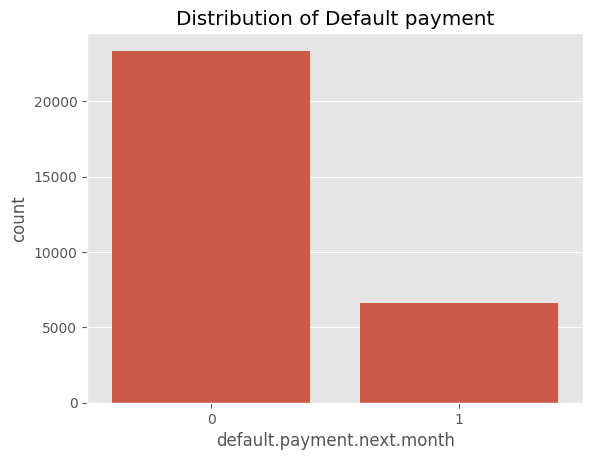

In [27]:
sns.countplot(x = 'default.payment.next.month', data = df)
plt.title('Distribution of Default payment')
plt.show()

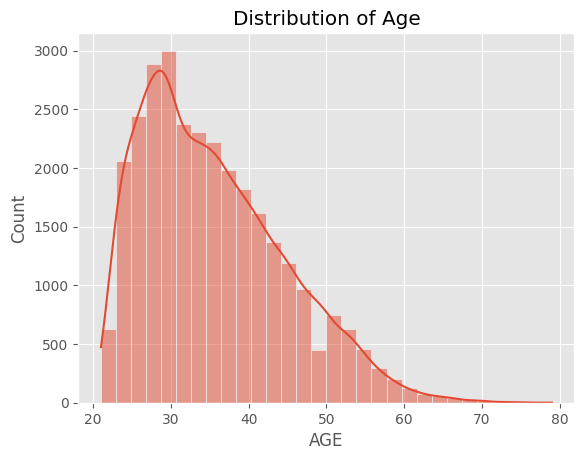

In [31]:
sns.histplot(df['AGE'], bins = 30, kde = True)
plt.title('Distribution of Age')
plt.show()

<Axes: >

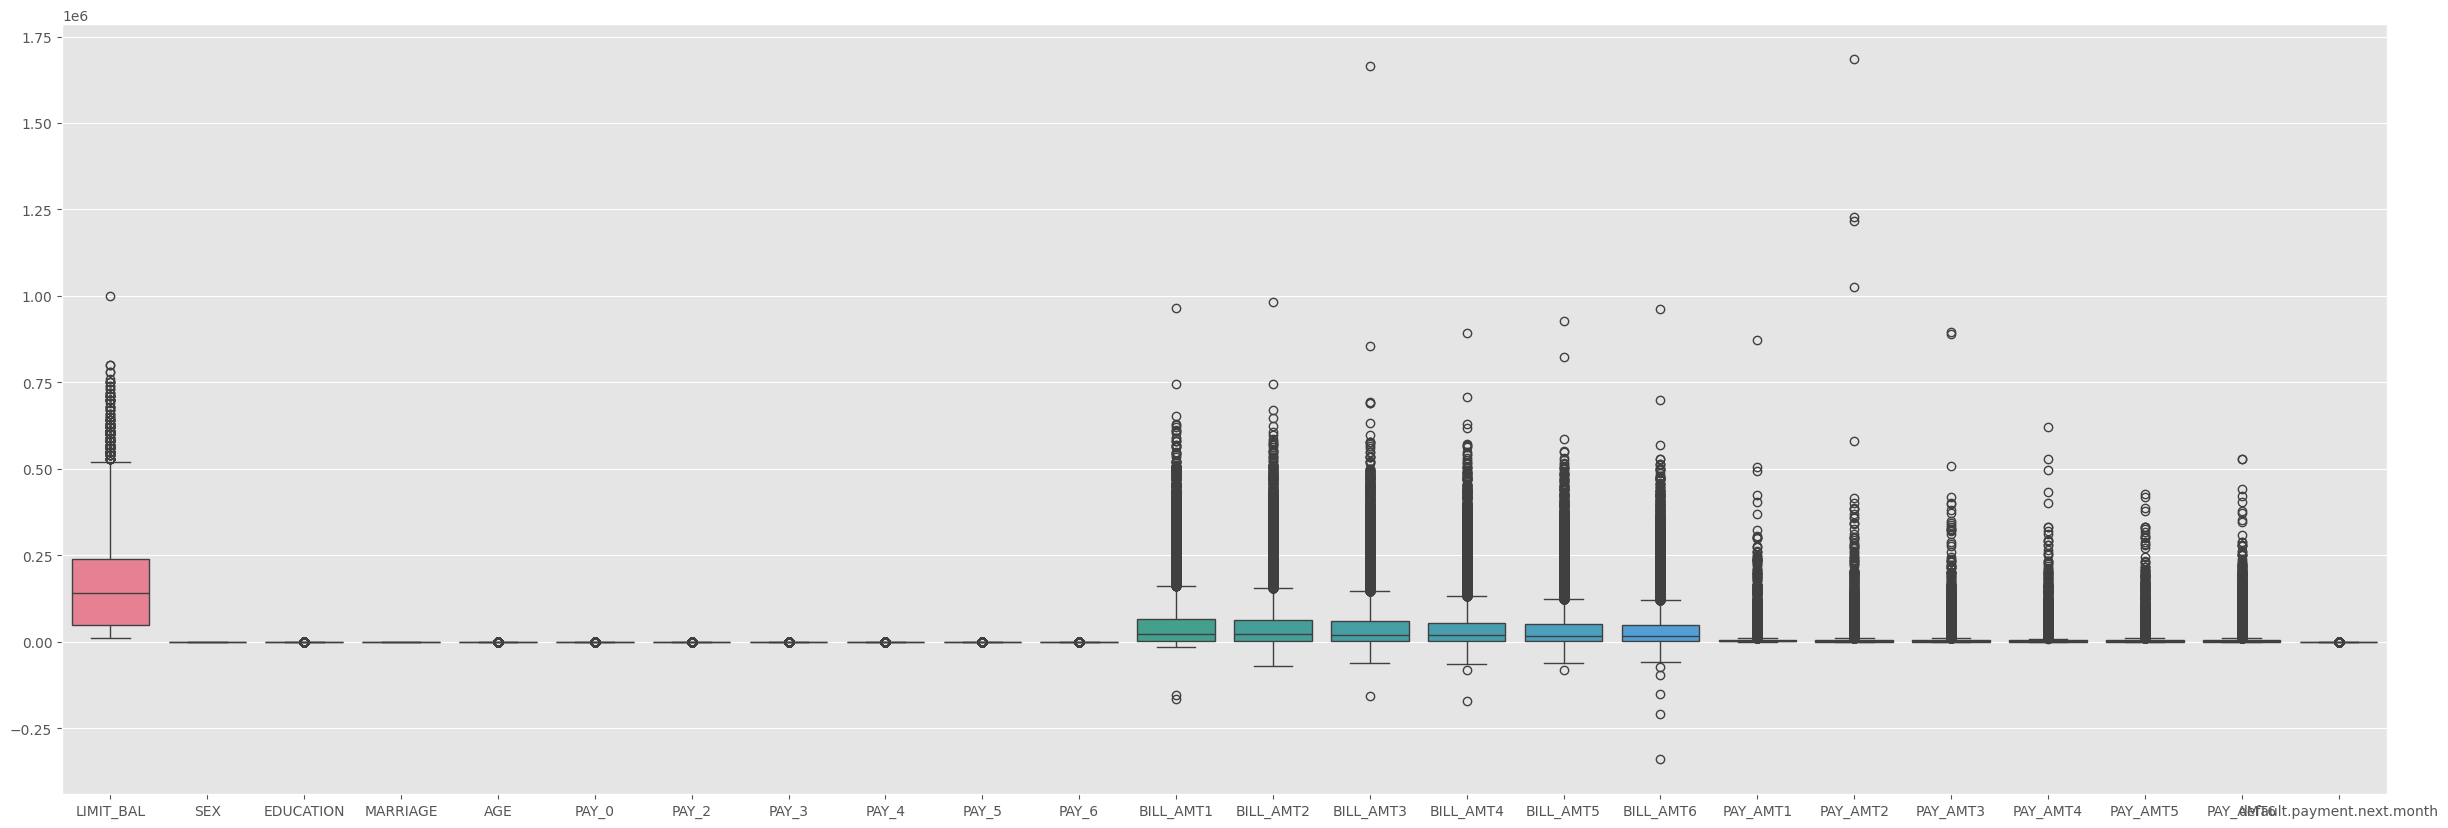

In [32]:
plt.figure(figsize = (30, 10))
sns.boxplot(data = df)

In [33]:
X = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
df.shape

(30000, 24)

In [38]:
X_train.shape

(24000, 23)

In [40]:
y_train.shape

(24000,)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test_scaled)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.81


In [46]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



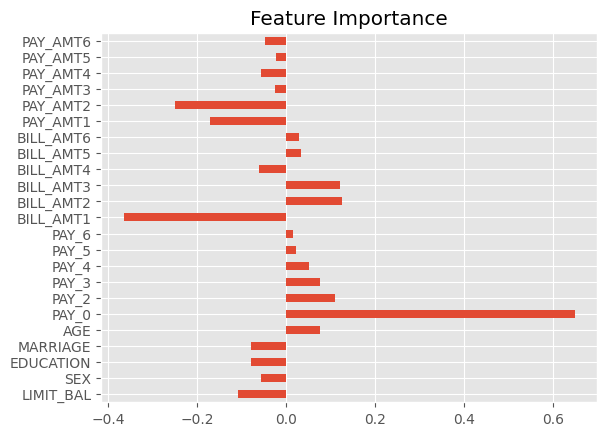

In [48]:
pd.Series(model.coef_[0], index = X.columns).plot(kind = 'barh')
plt.title('Feature Importance')
plt.show()

In [49]:
features_importance = pd.Series(model.coef_[0], index = X.columns)
features_importance = features_importance.abs().sort_values(ascending=False)
print(features_importance)

PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [50]:
import pickle

In [51]:
pickle.dump(model, open('model.pkl', 'wb'))